<a href="https://colab.research.google.com/github/LucasGleysson/Senac_ML/blob/master/ML_Aula_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais com TensorFlow

In [6]:
import tensorflow as tf
import tensorflow.keras as keras

In [9]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass','female','age','fare']
titanic['female'] = titanic['sex'].map({'male':0, 'female':1})
titanic.dropna(subset=feature_names, inplace=True) #891 para 714

x = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=123)

In [10]:
print('Tamanho de x_train:', x_train.shape)
print('Tamanho de x_test:', x_test.shape)
print('Tamanho de y_train:', y_train.shape)
print('Tamanho de y_test:', y_test.shape)

Tamanho de x_train: (535, 4)
Tamanho de x_test: (179, 4)
Tamanho de y_train: (535,)
Tamanho de y_test: (179,)


In [14]:
# Cria uma rede neural sequencial - feed foward
model = keras.models.Sequential() 

# Primeira hidden layer
model.add(keras.layers.Dense(4, activation='relu', input_shape=x_train[0].shape))
model.add(keras.layers.Dropout(0.2))

# output layer com ativação
model.add(keras.layers.Dense(1, activation= 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss=keras.losses.binary_crossentropy, 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

In [17]:
# x_train 535 / 32 = 16.71 (então são 17 batches de )
batch_size = 32
epochs = 100

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 13.6455 - accuracy: 0.5944 - val_loss: 9.1018 - val_accuracy: 0.6034
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 11.6560 - accuracy: 0.6075 - val_loss: 8.3042 - val_accuracy: 0.6034
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 11.2605 - accuracy: 0.5757 - val_loss: 7.5468 - val_accuracy: 0.6034
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 10.4076 - accuracy: 0.5776 - val_loss: 6.8014 - val_accuracy: 0.6034
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 9.2919 - accuracy: 0.5850 - val_loss: 6.1359 - val_accuracy: 0.6034
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 8.5614 - accuracy: 0.5738 - val_loss: 5.5048 - val_accuracy: 0.6034
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 7.7018 - accuracy: 0.5757 - val_loss: 4.9343 - val_accuracy: 0.6034
Epoch 8/

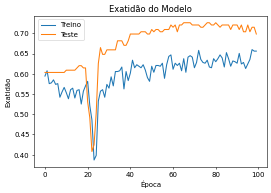

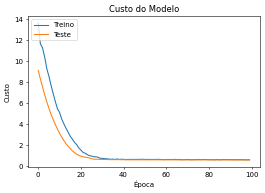

In [18]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi'] = 50

# Plot acurácia de treino e validação
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exatidão do Modelo')
plt.ylabel('Exatidão')
plt.xlabel('Época')
plt.legend(['Treino','Teste'], loc='upper left')
plt.show()

# Plot custo de treino e validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custo do Modelo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.legend(['Treino','Teste'], loc='upper left')
plt.show()


In [20]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.6983


[0.5772101283073425, 0.6983240246772766]

In [19]:
(model.predict(x_test) > 0.5).astype('int32')

6/6 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    